<a href="https://colab.research.google.com/github/SofiaPenyaGonzalez/TRABAJOS/blob/main/PR%C3%81CTICA_3_GRUPO_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos Genéticos

## Enunciado:

1.- Encontrar los máximos de la función "picos"  $$\ z=f(x,y) = 3(1-x)^2e^{-(x^2)-(y+1)^2}-10(x/5-x^3-y^5)e^{-x^2-y^2}-1/3e^{-(x+1)^2-y^2}$$

En el dominio

$$\{x,y\} \in [−100,100] $$

### Instalamos librerias:*texto en cursiva*

Antes de proceder a resolver el ejercicio, tenemos que instalar una serie de librerías o paquetes: 


*   **Deap**
*   **Matplotlib**
*   **Numpy**
*   **Scipy**
*   **Scoop**



In [882]:
!pip install deap
!pip install matplotlib
!pip install numpy
!pip install scipy
!pip install scoop

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Importamos Librerías:

In [883]:
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

# Importamos las librerías necesarias
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Importamos la librería
import random



A continuación, vamos a generar 10 números aleatorios en el rango (-100,100) y los vamos a asignar a dos variables:

In [884]:
# Fijamos la semilla
np.random.seed(0)
# Generamos los números pseudo-aleatorios
# Son los mismos mientras no cambiemos la semilla
# Numpy genera directamente los vectores
x = np.random.uniform(-100, 100, 10).reshape(1, 10) 
y = np.random.uniform(-100, 100, 10).reshape(1, 10) 
print('x= ', x)
print('y= ', y)

x=  [[  9.76270079  43.03787327  20.55267521   8.9766366  -15.26904013
   29.17882261 -12.48255775  78.35460016  92.7325521  -23.31169623]]
y=  [[ 58.34500762   5.77898395  13.60891222  85.11932766 -85.79278836
  -82.57414006 -95.95632051  66.52396911  55.63135019  74.00242965]]


### Visualización de la Función Objetivo

In [885]:
# Definimos la función objetivo
def funcion_prueba(x):
    # x es x[0] e y es x[1]
    res = 3*(1-x[0])**2*np.exp(-1*(x[0]**2)-(x[1]+1)**2)-10*(x[0]/5-x[0]**3-x[1]**5)*np.exp(-1*(x[0]**2)-x[1]**2)-1/3*np.exp(-1*(x[0]+1)**2-x[1]**2)
    return res

In [886]:
# Generamos vectores que barran todo el dominio
x = np.linspace(-7, 7, 1000)
y = np.linspace(-7, 7, 1000)
# print('x= ', x)
# print('y= ', y)

In [887]:
# Evaluamos todos los valores de las variables
x_ax, y_ax = np.meshgrid(x, y)
vals = np.c_[x_ax.ravel(), y_ax.ravel()]
fx = np.reshape([funcion_prueba(val) for val in vals],(1000, 1000))

Text(0.5, 0, 'f(x,y)')

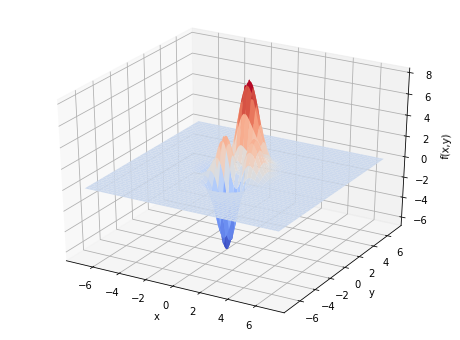

In [888]:
# Representamos los resultados obtenidos
figure_3d = plt.figure(figsize=(8,6))
ax = figure_3d.gca(projection="3d")
ax.plot_surface(x_ax, y_ax, fx, cmap=cm.coolwarm)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")

1. Definición del problema y generación de la población inicial
- 1.1 Creación del problema
- 1.2 Creación de la plantilla del individuo
- 1.3 Crear individuos aleatorios y población inicial
2. Función objetivo y operadores genéticos
- 2.1 Función objetivo
3. Incorporación de los operadores genéticos
4. Últimos pasos: Algortimo Genético como caja negra
- 4.1 Configuración algoritmo genético
- 4.2 Resultados del algoritmo genético
5. Convergencia del algoritmo
6. Conclusión


# 1. Definición del problema y generación de la población inicial

## 1.1 Creación del problema 

A continuación, vamos a definir el problema de optimización. En nuestro caso, se está buscando encontrar los máximos. Para ello, utilizaremos  `creator`  de la librería `deap` para crear una nueva clase llamada `FitnessMax`.



In [889]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

/usr/local/lib/python3.8/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


## 1.2 Creación de la plantilla del individuo

Lo siguiente que se va a hacer es crear el tipo de individuo, es decir, si va a ser una lista, tupla... y los atributos que va a tener. Para ello, creamos la clase Individual que utiliza la clase `list` y que contiene el atributo `fitness` inicializado anteriormente con `FitnessMax`.

In [890]:
creator.create("Individual", list, fitness=creator.FitnessMax)

/usr/local/lib/python3.8/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


## 1.3 Crear individuos aleatorios y población inicial

A continuación, definimos el Toolbox, el cual contendrá un conjunto de funciones que utilizará el Algortimo Genético durante la ejecución mediante registro. Algunos de las funciones suelen ser: 
*  Función para crear los individuos de forma aleatoria
*  Función para crear la población
*  Operadores genéticos (selección, cruce y mutación)
*  Función objetivo

Debido a que se debe de realizar una comparación con tres tipo de cruces:  
*  Cruce con un punto de cruce.
*  Cruce con dos puntos de
cruce 
*  Cruce uniforme

vamos a establecer tres Pruebas.

In [891]:

toolbox1 = base.Toolbox()
toolbox2 = base.Toolbox()
toolbox3 = base.Toolbox()

In [892]:
# Generación de genes Prueba 
toolbox1.register("attr_uniform", random.uniform, -100, 100)
# Generación de genes Prueba 
toolbox2.register("attr_uniform", random.uniform, -100, 100)
toolbox3.register("attr_uniform", random.uniform, -100, 100)

`attr_uniform` es una función que permite crear individuos de manera aleatoria mediante `random.uniform`. Nos permite, para cada variable independiente, generar un valor aleatorio dentro del rango establecido en el enunciado (-100,100). 

In [893]:
# Probamos y vemos que generamos un número leatorio entre -100 y 100 distinto cada vez
toolbox1.attr_uniform()
toolbox2.attr_uniform()
toolbox3.attr_uniform()

-33.30697098639419

In [894]:
# Generación de inviduos Prueba 
toolbox1.register("individual", tools.initRepeat, creator.Individual,
                 toolbox1.attr_uniform, 2)
toolbox2.register("individual", tools.initRepeat, creator.Individual,
                 toolbox1.attr_uniform, 2)
toolbox3.register("individual", tools.initRepeat, creator.Individual,
                 toolbox1.attr_uniform, 2)


In [895]:
# Ejemplo de la generación de un individuo aleatorio
individuo1 = toolbox1.individual()
individuo2 = toolbox2.individual()
individuo3 = toolbox2.individual()

In [896]:
# Recordar que individuo es una lista que tiene un atributo fitness
# donde se almacena la calidad del mismo, que al principio será
# vacío, porque aun no ha sido evaluado
individuo1.fitness.values
individuo2.fitness.values
individuo3.fitness.values


()

A continuación, generamos, mediante la función `population`, la población en cada uno de nuestras Pruebas. Dentro de la función utilizaremos `initRepeat` donde se establece el número de llamadas a la función que se quiere realizar que corresponde, también, con la población inicial. También, se especifica que se debe de guardar como una lista. 

En nuestro caso, vamos a elegir el número 100, ya que es divisible entre 4 para que no de ningún error al no cumplir algún requisito. Además, hemos escogido este valor puesto que valores inferiores nos han presentado problemas y resultados menores.


In [897]:
# Generación de población
toolbox1.register("population", tools.initRepeat, list,
                 toolbox1.individual, 100)
toolbox2.register("population", tools.initRepeat, list,
                 toolbox2.individual, 100)
toolbox3.register("population", tools.initRepeat, list,
                 toolbox2.individual, 100)

In [898]:
# Ejemplo de creación de una población. Se ve que es
# una lista de 24 listas (una por cada individuo)
poblacion1 = toolbox1.population()
poblacion2 = toolbox2.population()
poblacion3 = toolbox2.population()

In [899]:
# Cada individuo tiene 2 componentes
poblacion1[0]
poblacion2[0]
poblacion3[0]

[95.47112692611321, -65.25654583704619]

In [900]:
poblacion1[0].fitness.values
poblacion2[0].fitness.values
poblacion3[0].fitness.values

()

# 2. Función objetivo y Operadores Genéticos

## 2.1 Función objetivo

1.- Encontrar los máximos de la función "picos"  $$\ z=f(x,y) = 3(1-x)^2e^{-(x^2)-(y+1)^2}-10(x/5-x^3-y^5)e^{-x^2-y^2}-1/3e^{-(x+1)^2-y^2}$$

En el dominio

$$\{x,y\} \in [−100,100] $$








In [901]:
def funcion_objetivo(x):
    """
    Función objetivo de nuestro problema
    """
    for i in range(len(x)):
        if x[i] > 100 or x[i] < -100:
            return -1,
    res = 3*(1-x[0])**2*np.exp(-(x[0]**2)-(x[1]+1)**2)-10*(x[0]/5-x[0]**3-x[1]**5)*np.exp(-x[0]**2-x[1]**2)-1/3*np.exp(-(x[0]+1)**2-x[1]**2)
    return res,

Al tratarse de una función en la cual se debe de maximizar, no pueden haber valores fuera del rango [-100,100]. Si se diera el caso, retornaría la función un -1, es decir, se aplicaría la *Pena de Muerte* ya que al devolver dicho valor (número negativo) condenaría totalmente el resultado obtenido provocando que el individuo o individuos no puedan intervenir en la mutación o en el cruce.  

Registramos la Función Objetivo 

In [902]:
toolbox1.register("evaluate", funcion_objetivo)
toolbox2.register("evaluate", funcion_objetivo)
toolbox3.register("evaluate", funcion_objetivo)

# 3. Incorporar los operadores genéticos

## Cruce

In [903]:
# Registro de operacion genética de Cruce en un Punto
toolbox1.register("mate", tools.cxOnePoint)
# Registro de operacion genética de Cruce en dos Puntos
toolbox2.register("mate", tools.cxTwoPoint)
# Registro de operacion genética de Cruce Uniforme
toolbox3.register("mate", tools.cxUniform, indpb = 0.5)

Con respecto al Cruce Uniforme la probabilidad es del 50% ya que es un valor lo suficientemente elevado para considerarse neutro y que haya la misma probabilidad de que se produzca un cruce o no. 

## Mutación

In [904]:
toolbox1.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)
toolbox2.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)
toolbox3.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)

Para la mutación de las tres pruebas hemos decidido dejar los parámetros de desviación típica y media como 5 y 0 respectivamente aunque estos pueden variar según el criterio del programador, es decir, no son valores fijos. 


## Selección

In [905]:
toolbox1.register("select", tools.selTournament, tournsize=3)
toolbox2.register("select", tools.selTournament, tournsize=3)
toolbox3.register("select", tools.selTournament, tournsize=3)

En la fase de Selección, se escoge manualmente un número aleatorio, que en nuestro caso ha sido el número 3 ya que en la selección mediante torneo es un tamaño que relativamente es lo más óptimo para la mayoría de los casos.

# 4. Últimos Pasos: Algortimo genético como una caja negra 

## 4.1 Configuración del Algortimo Genético

In [906]:
def main1():
    random.seed(42)
    CXPB, MUTPB, NGEN = 0.5, 0.2, 20
    pop = toolbox1.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox1, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook

In [907]:
best1, log1 = main1()
print("Mejor fitness: %f" %best1[0].fitness.values)
print("Mejor individuo %s" %best1[0])

gen	nevals	avg        	std        	min         	max        
0  	100   	1.93843e-50	1.92871e-49	-8.19747e-63	1.93843e-48
1  	49    	-0.01      	0.0994987  	-1          	1.93843e-48
2  	52    	9.54873e-32	9.50086e-31	0           	9.54873e-30
3  	64    	2.86462e-31	1.62889e-30	-3.56017e-85	9.54873e-30
4  	58    	-0.000366985	0.00365146 	-0.0366985  	6.5714e-21 
5  	54    	1.99884e-21 	1.53568e-20	0           	1.53884e-19
6  	50    	1.83181e-20 	7.80529e-20	-1.32976e-61	3.93195e-19
7  	74    	1.70604e-11 	1.69749e-10	-2.91446e-52	1.70604e-09
8  	51    	1.36313e-09 	1.33926e-08	5.33806e-108	1.34607e-07
9  	50    	5.38428e-09 	2.63774e-08	5.92491e-35 	1.34607e-07
10 	50    	1.8845e-08  	4.67068e-08	6.5714e-21  	1.34607e-07
11 	65    	4.98379e-08 	6.49853e-08	1.53884e-19 	1.3565e-07 
12 	52    	1.01114e-07 	5.80737e-08	9.20815e-18 	1.35972e-07
13 	50    	0.0662859   	0.653976   	2.63794e-18 	6.57303    
14 	70    	0.176375    	1.01234    	8.50633e-20 	6.57303    
15 	60    	0.268031    	1.293

In [908]:
def main2():
    random.seed(42)
    CXPB, MUTPB, NGEN = 0.5, 0.2, 20
    pop = toolbox2.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox2, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook

In [909]:
best2, log2 = main2()
print("Mejor fitness: %f" %best2[0].fitness.values)
print("Mejor individuo %s" %best2[0])

gen	nevals	avg        	std        	min         	max        
0  	100   	1.93843e-50	1.92871e-49	-8.19747e-63	1.93843e-48
1  	55    	9.69215e-50	4.2247e-49 	-5.6445e-140	1.93843e-48
2  	54    	-2.77757e-10	2.76365e-09	-2.77757e-08	9.62191e-38
3  	54    	1.39112e-25 	1.38414e-24	0           	1.39112e-23
4  	43    	-2.77757e-10	2.76365e-09	-2.77757e-08	1.39112e-23
5  	61    	9.2011e-15  	6.63727e-14	0           	5.84792e-13
6  	64    	-8.5687e-05 	0.000852575	-0.0085687  	5.84792e-13
7  	61    	0.00101441  	0.0100932  	4.41527e-65 	0.101441   
8  	51    	0.0653251   	0.617144   	-6.94448e-08	6.20338    
9  	55    	0.197282    	1.05693    	-6.23852e-14	6.20338    
10 	58    	0.617602    	1.87859    	-2.43588    	6.20338    
11 	59    	1.79351     	2.75949    	-9.91273e-17	6.20338    
12 	52    	4.34659     	2.78739    	-0.491237   	6.20338    
13 	66    	5.90065     	1.27026    	9.62e-33    	6.20338    
14 	60    	5.84401     	1.62766    	-4.9379     	6.20338    
15 	65    	5.86283     	1.5

In [910]:
def main3():
    random.seed(42)
    CXPB, MUTPB, NGEN = 0.5, 0.2, 20
    pop = toolbox3.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox3, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook

In [911]:
best3, log3 = main3()
print("Mejor fitness: %f" %best3[0].fitness.values)
print("Mejor individuo %s" %best3[0])

gen	nevals	avg        	std        	min         	max        
0  	100   	1.93843e-50	1.92871e-49	-8.19747e-63	1.93843e-48
1  	48    	1.16306e-49	4.60351e-49	0           	1.93843e-48
2  	58    	9.62191e-40	9.57368e-39	-8.02396e-118	9.62191e-38
3  	57    	-5.55514e-10	3.8886e-09 	-2.77757e-08 	1.39112e-23
4  	57    	2.79554e-25 	1.94742e-24	-6.09907e-315	1.39112e-23
5  	53    	1.30985e-21 	1.30258e-20	5.60587e-55  	1.30915e-19
6  	66    	1.65077e-14 	9.39622e-14	1.93843e-48  	5.84792e-13
7  	58    	6.27776e-14 	1.78717e-13	-1.87111e-79 	5.84792e-13
8  	61    	6.07799e-13 	4.15143e-12	-2.42373e-67 	4.18267e-11
9  	60    	0.000149047 	0.00144547 	8.78667e-32  	0.0145264  
10 	59    	0.000150147 	0.00144539 	8.38211e-41  	0.0145264  
11 	63    	0.000737919 	0.00595984 	1.45276e-13  	0.0582675  
12 	60    	0.012153    	0.0824739  	2.52388e-16  	0.82095    
13 	59    	0.0357153   	0.140336   	5.84792e-13  	0.82095    
14 	55    	0.106324    	0.597803   	-2.61488     	5.01005    
15 	67    	0.29

## 4.2 Resultados del algoritmo genético

Una vez establecidos los parámetros, realizado los cálculos y obtenido los siguiente resultados:


*   Prueba con Cruce en un punto: obtuvo su máximo en una población de 100 individuos en el 7.413065.
*   Prueba con Cruce en dos puntos: obtuvo su máximo en una población de 100 individuos en el 6.203384.
*   Prueba con Cruce Uniforme:obtuvo su máximo en una población de 100 individuos en el 5.857719.

Sin embargo, debido a que se tratan de valores aleatorizados en función de una semilla los resultados pueden variar con cada iteración.

# 5. Convergencia del algoritmo

In [912]:
def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    # ax1.fill_between(gen, fit_mins, fit_maxs, where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-7, 10])
    ax1.legend(["Min", "Max", "Avg"], loc='upper left')
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

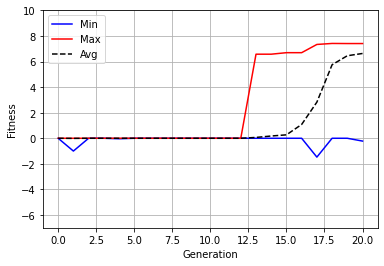

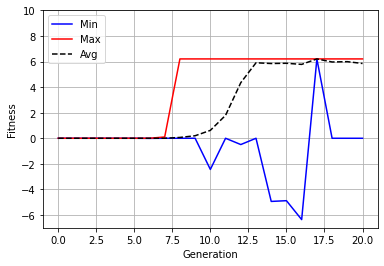

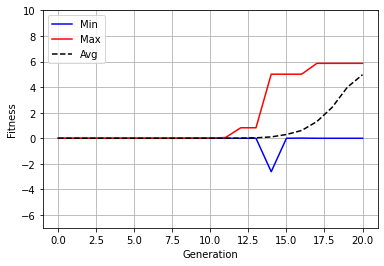

In [913]:
i=log1,log2,log3
for j in i:
  plot_evolucion(j)
  

Observando las tres gráficas obtenidas, se muestran los máximos, mínimos y la media de los individuos adaptados. Concluimos que los individuos máximos se alcanzan antes en la segunda prueba. Sin embargo, en esta misma prueba se obtienen unos individuos mínimos más notorios que en las otras pruebas. 

Podríamos elegir el más eficiente en función del objetivo, que en este caso, es el de maximizar. Por ello, la primera gráfica, donde se utiliza el Cruce en un punto, es donde se encuentra el mayor de los máximos de las tres pruebas. 

# 5. Conclusiones

Cabe destacar que nuestra solución óptima se verá influenciada por nuestros objetivos de trabajo, ya que escogeremos métodos diferentes dependiendo de si buscamos la rapidez o la exactitud, por ejemplo. Esto se debe a que, como se ha estudiado en clase, en diversas ocasiones las empresas y organismos 'sacrifican' la exactitud de la solución determinada que buscan, por la eficacia con la que son capaces de adquirirla (aunque esta última tenga un rango de error más elevado).

